# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("/Users/Xugao/Desktop/MIT_ADSP/elective_project/cleaned_data.csv")
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [48]:
corr_matrix = data.corr()
corr_matrix["BAD"].sort_values(ascending=False)

BAD        1.000000
DELINQ     0.346503
DEROG      0.269921
NINQ       0.170031
DEBTINC    0.154544
CLNO      -0.004543
VALUE     -0.036492
MORTDUE   -0.046186
YOJ       -0.053956
LOAN      -0.075099
CLAGE     -0.165614
Name: BAD, dtype: float64

In [49]:
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [50]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [12]:
x_col = data[['REASON','JOB']]
x_col

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,DebtCon,Other
4,HomeImp,Office
...,...,...
5955,DebtCon,Other
5956,DebtCon,Other
5957,DebtCon,Other
5958,DebtCon,Other


In [13]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_col = onehotencoder.fit_transform(x_col).toarray()
x_col.shape

(5960, 8)

In [14]:
x_col = pd.DataFrame(x_col)

x_col

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5955,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5956,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5957,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
 x = data.drop(["BAD"],axis=1)

In [16]:
x_num = data[["LOAN","MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"]]
x_num

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [17]:
x_num=x_num.astype(int)
x_num

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860,39025,10,0,0,94,1,9,34
1,1300,70053,68400,7,0,2,121,0,14,34
2,1500,13500,16700,4,0,0,149,1,10,34
3,1500,65019,89235,7,0,0,173,1,20,34
4,1700,97800,112000,3,0,0,93,0,14,34
...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264,90185,16,0,0,221,0,16,36
5956,89000,54576,92937,16,0,0,208,0,15,35
5957,89200,54045,92924,15,0,0,212,0,15,35
5958,89800,50370,91861,14,0,0,213,0,16,34


In [18]:
x_all = pd.concat([x_col,x_num],axis=1)
x_all

,0,1,2,3,4,5,6,7,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1100,25860,39025,10,0,0,94,1,9,34
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1300,70053,68400,7,0,2,121,0,14,34
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1500,13500,16700,4,0,0,149,1,10,34
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500,65019,89235,7,0,0,173,1,20,34
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1700,97800,112000,3,0,0,93,0,14,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,88900,57264,90185,16,0,0,221,0,16,36
5956,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89000,54576,92937,16,0,0,208,0,15,35
5957,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89200,54045,92924,15,0,0,212,0,15,35
5958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89800,50370,91861,14,0,0,213,0,16,34


In [19]:
# feature scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_all)

In [20]:
x

array([[0.        , 1.        , 0.        , ..., 0.05882353, 0.12676056,
        0.16748768],
       [0.        , 1.        , 0.        , ..., 0.        , 0.1971831 ,
        0.16748768],
       [0.        , 1.        , 0.        , ..., 0.05882353, 0.14084507,
        0.16748768],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.21126761,
        0.17241379],
       [1.        , 0.        , 0.        , ..., 0.        , 0.22535211,
        0.16748768],
       [1.        , 0.        , 0.        , ..., 0.        , 0.22535211,
        0.16748768]])

In [21]:
y = data['BAD']
y 

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

### **Splitting the data into 70% train and 30% test set**

In [22]:
# Split the data into training and test set
# Remove _________ and complete the code

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =1)

In [23]:
x_train.shape

(4172, 18)

In [24]:
x_test.shape

(1788, 18)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [25]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [22]:
# Defining the Logistic regression model
# Remove _________ and complete the code


# Fitting the model on the training data 
# Remove _________ and complete the code

lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3355
           1       0.76      0.24      0.36       817

    accuracy                           0.84      4172
   macro avg       0.80      0.61      0.63      4172
weighted avg       0.82      0.84      0.80      4172



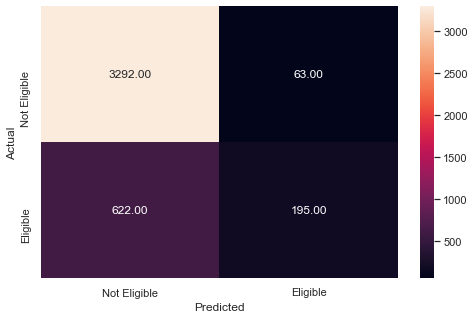

In [23]:
#Predict for train set
# Remove _________ and complete the code


#checking the performance on the train dataset
# Remove _________ and complete the code
y_pred_train = lg.predict(x_train)
metrics_score(y_train,y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1416
           1       0.80      0.22      0.34       372

    accuracy                           0.83      1788
   macro avg       0.81      0.60      0.62      1788
weighted avg       0.82      0.83      0.78      1788



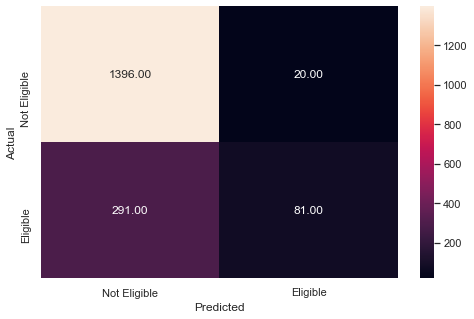

In [24]:
#Predict for test set
# Remove _________ and complete the code
#checking the performance on the test dataset

y_pred_test = lg.predict(x_test)
metrics_score(y_test,y_pred_test)

**Observations: __________**
*  Precision is 80%, which means all the points that are declared to be defaulted but 80% of them are actually defaulted.
* the precision on test data means 20%(1-80%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 34% here means the accuracy of model is bad.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  22% users predicted as defaulted users of all acutal defalted ratio is 22%.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [31]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

lg.coef_

array([[-0.11050423,  0.11041096, -0.05650958, -0.60896966, -0.11260213,
        -0.24342336,  0.64512613,  0.37628535, -1.28385803, -0.75017805,
         0.4854135 , -0.47073048,  4.80016938,  7.68425913, -3.91359955,
         2.67256041, -0.52913522,  4.74063488]])

In [32]:
lrparam_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],
                'penalty':['l1','l2'],
                'max_iter':list(range(100,800,100)),
                'solver':['newton-cg','lbfgs','libliner','sag','saga']}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
lg_tuned = GridSearchCV(LogisticRegression(),lrparam_grid,refit=True, verbose=3,cv=4)
lg_tuned.fit(x_train,y_train)

Fitting 4 folds for each of 490 candidates, totalling 1960 fits
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.804, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.803, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.803, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=libliner ..............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=libliner, score=nan, total

[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.803, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.803, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.803, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=libliner ..............
[CV]  C=0.001, max_iter=400, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=libliner ..............
[CV]  C=0.001, max_iter=400, penalty=l2, solver=libliner, score=nan, total=  

[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=libliner ..............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=libliner, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=libliner ..............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=libliner, score=nan, total=   0.0s
[CV]

[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.803, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.00

[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.803, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.803, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.804, total=

[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.803, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV

[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.803, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.804, total=   0.0s
[CV] C=

[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.804, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.803, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=700, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=700, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=libliner ...............
[CV]  C=0.01, max_iter=700, penalty=l2, solver=libliner, score=nan, total=   0.0s
[CV]

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.811, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.810, total=   0.0s
[C

[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.

[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.826, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.829, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.829, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.811, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.810, total=   0.0s
[

[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.811, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.809, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.810, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter

[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.838, total=   0.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.830, total=   0.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.855, total=   0.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.844, total=   0.1s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.832, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.827, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.836, total=   0.0s
[CV] C=1, max_iter=1

[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.832, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.827, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.836, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.835, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.832, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.827, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.836, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, sol

[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.855, total=   0.1s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.844, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.832, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.827, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.836, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.835, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.832, total=   0.0s
[CV] C=1, max_

[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.835, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.832, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.827, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.836, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.835, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalt

[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.855, total=   0.1s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.844, total=   0.1s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.832, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.827, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.836, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.835, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.832, total=   0.0s
[CV] C=1, max_

[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.855, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.842, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.837, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.835, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.855, total=   0.1s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.842, total=   0.1s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, pe

[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.857, total=   0.1s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.847, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.837, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.835, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.855, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.842, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.837, total=   0.1s
[CV] C=

[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.855, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.842, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.837, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.835, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.855, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.842, total=   0.1s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, pe

[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.857, total=   0.1s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.847, total=   0.1s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.837, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.835, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.855, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.842, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.837, total=   0.1s
[CV] C=

[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.855, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.842, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.837, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.835, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.855, total=   0.1s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.842, total=   0.1s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, 

[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.834, total=   0.2s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.839, total=   0.2s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.856, total=   0.2s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.848, total=   0.2s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.834, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.839, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.856, total=   0.0s
[CV] C

[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.834, total=   0.2s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.839, total=   0.2s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.856, total=   0.2s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.847, total=   0.2s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.839, total=   0.2s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.856, total=   0.1s
[CV] C=100, max_iter=300,

[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.834, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.839, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.856, total=   0.3s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.848, total=   0.4s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.834, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.839, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.856, total=   0.0s
[CV] C

[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.839, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.856, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.847, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.834, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.839, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.856, total=   0.1s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.847, total=   0.1s
[CV] C=100, max_iter=700

[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.834, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.839, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.856, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.848, total=   0.1s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.834, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.839, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.856, total=   0.0s

[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.834, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.839, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.856, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.847, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.839, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.856, total=   0.1s
[CV] C=1000, max_i

[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.834, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.839, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.856, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.848, total=   0.2s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.834, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.839, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.856, total=   0.1s

[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.834, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.839, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.856, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.848, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.839, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.856, total=   0.1s
[CV] C=1000, max_i

[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.834, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.839, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.856, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.848, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.834, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.839, total=   0.1s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.856, total=   0.0s

[Parallel(n_jobs=1)]: Done 1960 out of 1960 | elapsed:   59.4s finished


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'libliner', 'sag',
                                    'saga']},
             verbose=3)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3355
           1       0.73      0.33      0.45       817

    accuracy                           0.84      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.84      0.82      4172



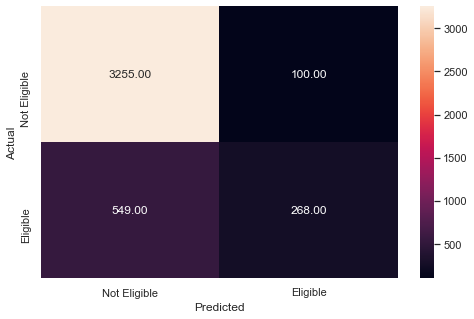

In [35]:
y_pred_train = lg_tuned.predict(x_train)
metrics_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.69      0.28      0.40       372

    accuracy                           0.82      1788
   macro avg       0.76      0.62      0.65      1788
weighted avg       0.81      0.82      0.79      1788



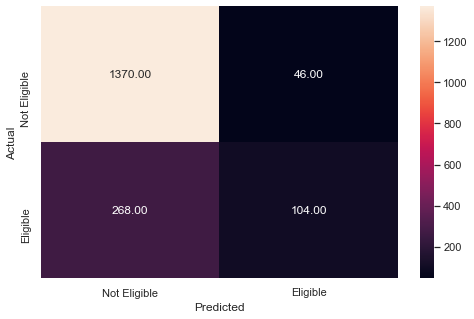

In [36]:
y_pred_test = lg_tuned.predict(x_test)
metrics_score(y_test,y_pred_test)

In [38]:
 y_score1 = lg_tuned.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_score1))

roc_auc_score for LogisticRegression:  0.8063851679727843


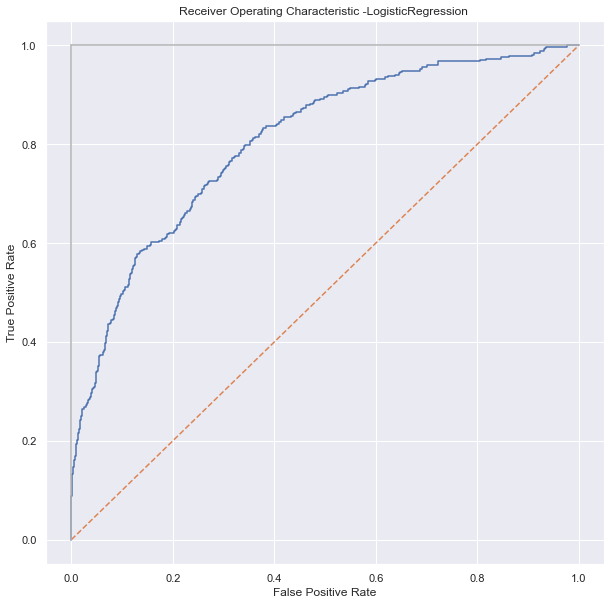

In [41]:
 plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic -LogisticRegression ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Insights ________**
*  Precision is 69%, which means all the points that are declared to be defaulted but 69% of them are actually defaulted.
* the precision on test data means 31%(1-69%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 40% here means the accuracy of model is bad.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  28% users predicted as defaulted users of all acutal defalted ratio is 28%.
* recall increased to 28% from 22% after tuning parameter.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [42]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

#### Separating the target variable y and independent variable x

#### Split the data

In [43]:
# Split the data into training and test set
# Remove _________ and complete the code

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [44]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

from sklearn.tree import DecisionTreeClassifier

In [45]:
DT = DecisionTreeClassifier(class_weight ={0: 0.2, 1: 0.8}, random_state =1)

In [46]:
#fitting Decision tree model
# Remove ___________ and complete the code

DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



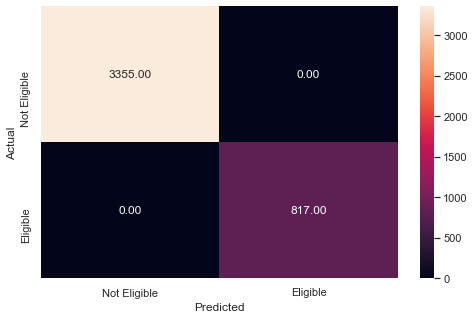

In [47]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_train_pred_df = DT.predict(x_train)

metrics_score(y_train, y_train_pred_df)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1416
           1       0.65      0.56      0.60       372

    accuracy                           0.85      1788
   macro avg       0.77      0.74      0.75      1788
weighted avg       0.84      0.85      0.84      1788



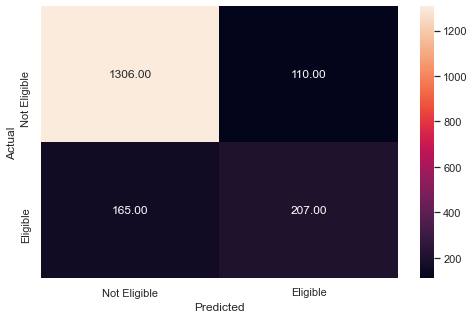

In [48]:
# Checking performance on the testing data
# Remove _________ and complete the code

y_test_pred_df = DT.predict(x_test)
metrics_score(y_test, y_test_pred_df)

**Insights _____________**
*  Precision is 65%, which means all the points that are declared to be defaulted but 65% of them are actually defaulted.
* the precision on test data means 35%(1-65%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 60% here means the accuracy of model is okay.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  56% users predicted as defaulted users of all acutal defalted ratio is 56%.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [49]:
# Choose the type of classifier. 
# Remove _________ and complete the code
DT_tuned = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state =1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2,7),
              'criterion': ['gini','entropy'],
              'min_samples_leaf': [5, 10, 20, 25]}



# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score , pos_label=1)


# Run the grid search
# Remove _________ and complete the code
gridCV = GridSearchCV(DT_tuned, parameters, scoring = scorer,
                     cv =10)

# Fit the GridSearch on train dataset
# Remove _________ and complete the code
gridCV = gridCV.fit(x_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
DT_tuned = gridCV.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
DT_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      3355
           1       0.54      0.83      0.65       817

    accuracy                           0.83      4172
   macro avg       0.74      0.83      0.77      4172
weighted avg       0.87      0.83      0.84      4172



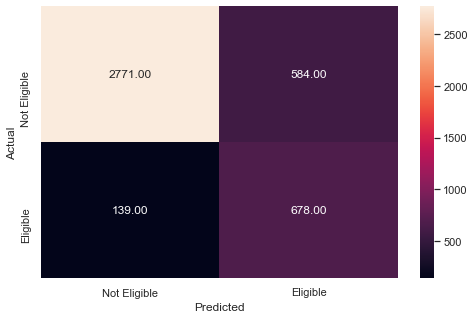

In [50]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_train_pred_dt = DT_tuned.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1416
           1       0.53      0.81      0.64       372

    accuracy                           0.81      1788
   macro avg       0.74      0.81      0.76      1788
weighted avg       0.86      0.81      0.83      1788



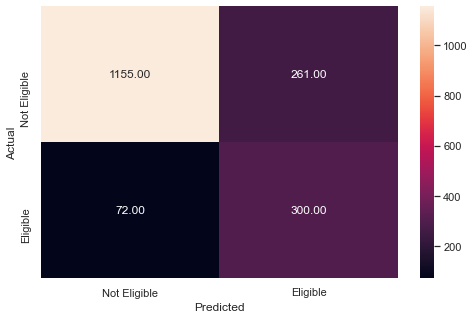

In [52]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

y_test_pred_dt = DT_tuned.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [76]:
 y_score1 = DT_tuned.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.8754347396877469


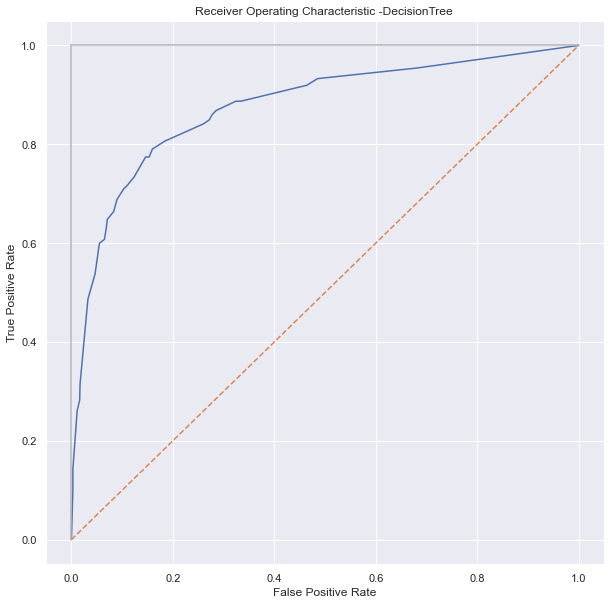

In [78]:
 plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic -DecisionTree ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Insights ___________**
* Precision is 53%, which means all the points that are declared to be defaulted but 69% of them are actually defaulted.
* the precision on test data means 47%(1-53%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 64% here means the accuracy of model is okay.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  81% users predicted as defaulted users of all acutal defalted ratio is 81%.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [53]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1:0.7}, random_state =1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



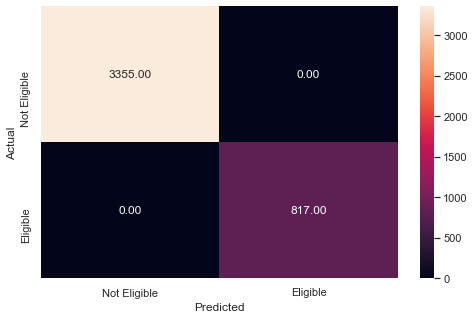

In [54]:
#Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1416
           1       0.93      0.66      0.77       372

    accuracy                           0.92      1788
   macro avg       0.92      0.82      0.86      1788
weighted avg       0.92      0.92      0.91      1788



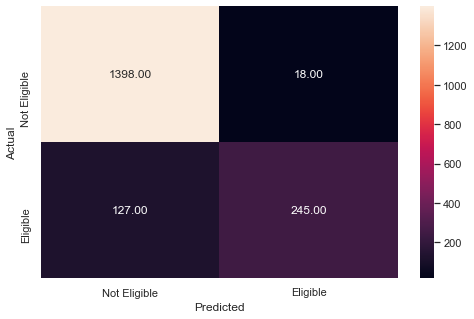

In [55]:
# Checking performance on the test data
# Remove _________ and complete the code
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Observations: __________**
* Precision is 93%, which means all the points that are declared to be defaulted but 93% of them are actually defaulted.
* the precision on test data means 7%(1-93%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 77% here means the accuracy of model is good.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  66% users predicted as defaulted users of all acutal defalted ratio is 66%.

### **Build a Random Forest model with Class Weights**

In [56]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(class_weight ={0: 0.2, 1: 0.8}, random_state =1)


# Fitting Random Forest model
# Remove _________ and complete the code

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



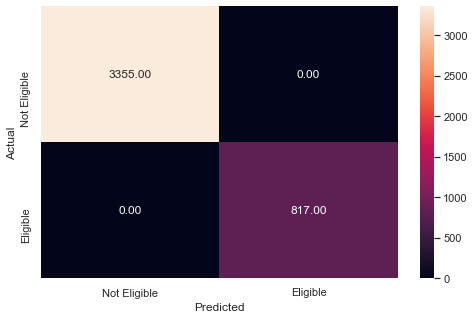

In [57]:
# Checking performance on the train data
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train,y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1416
           1       0.92      0.62      0.74       372

    accuracy                           0.91      1788
   macro avg       0.91      0.80      0.84      1788
weighted avg       0.91      0.91      0.90      1788



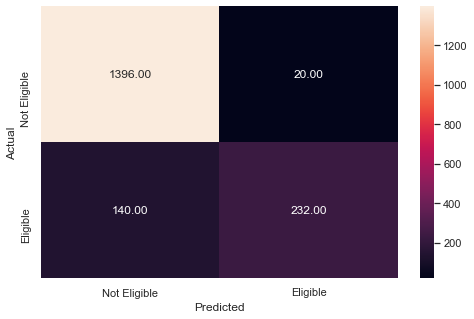

In [58]:
# Checking performance on the test data
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test,y_pred_test_rf)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [59]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)


# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.7, 1: 0.3}, "balanced", {0: 0.4, 1: 0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv=5)

grid_obj = grid_obj.fit(x_train,y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3355
           1       0.62      0.80      0.70       817

    accuracy                           0.86      4172
   macro avg       0.78      0.84      0.80      4172
weighted avg       0.88      0.86      0.87      4172



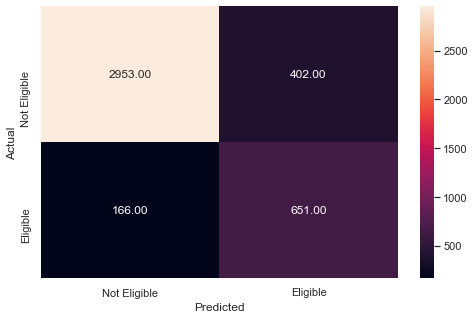

In [80]:
# Checking performance on the training data
# Remove _________ and complete the code
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1416
           1       0.61      0.75      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.86      0.85      0.85      1788



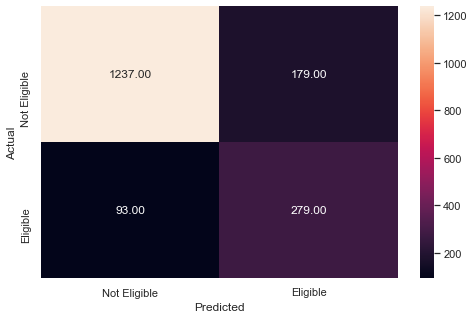

In [63]:
# Checking performace on test dataset
# Remove _________ and complete the code

y_pre_test_rf = rf_estimator_tuned.predict(x_test)
metrics_score(y_test,y_pre_test_rf)

In [65]:
 y_score1 = rf_estimator_tuned.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score1))

roc_auc_score for RandomForest:  0.8937450640908815


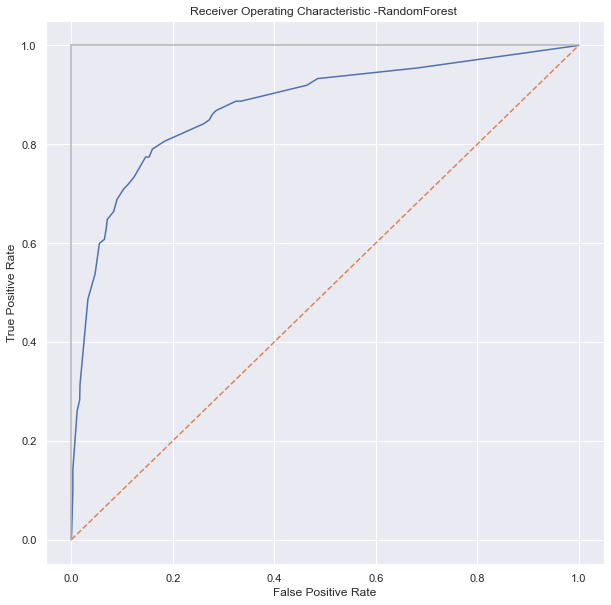

In [79]:
 plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic -RandomForest ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Insights: _____**

*  Precision is 61%, which means all the points that are declared to be defaulted but 61% of them are actually defaulted.
* the precision on test data means 39%(1-61%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 67% here means the accuracy of model is good.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  75% users predicted as defaulted users of all acutal defalted ratio is 75%.
* the roc-auc score tells how much the model is capable of distinguishing between classes, the better the model is at predicting defaulted classes as 1 and paid classes as 0. here 0.89 means we got a good model.

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

In [98]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [101]:
def get_recall_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [71]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [72]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,x_train=x_train,x_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
    
    return c # returning the list with train and test scores

In [73]:
# Make the list of all the model names 

models = [lg,lg_tuned,DT,DT_tuned,rf_estimator,rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [81]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':[lg,lg_tuned,DT,DT_tuned,rf_estimator,rf_estimator_tuned], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(),0.835810,0.826063,0.238678,0.217742,0.755814,0.801980
1,"GridSearchCV(cv=4, estimator=LogisticRegressio...",0.844439,0.824385,0.328029,0.279570,0.728261,0.693333
2,"DecisionTreeClassifier(class_weight={0: 0.2, 1...",1.000000,0.846197,1.000000,0.556452,1.000000,0.652997
3,"DecisionTreeClassifier(class_weight={0: 0.17, ...",0.826702,0.813758,0.829865,0.806452,0.537242,0.534759
4,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.910515,1.000000,0.623656,1.000000,0.920635
5,"(DecisionTreeClassifier(criterion='entropy', m...",0.863854,0.847875,0.796818,0.750000,0.618234,0.609170


**Insights: ________**
* tuned Logistic regression:Precision is 69%, which means all the points that are declared to be defaulted but 69% of them are actually defaulted.
* the precision on test data means 31%(1-69%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 40% here means the accuracy of model is bad.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  28% users predicted as defaulted users of all acutal defalted ratio is 28%.
* recall increased to 28% from 22% after tuning parameter.
* tuned decision tree: Precision is 53%, which means all the points that are declared to be defaulted but 53% of them are actually defaulted.
* the precision on test data means 47%(1-53%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 64% here means the accuracy of model is okay.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  81% users predicted as defaulted users of all acutal defalted ratio is 81%, which is heplful for banks to reach real defaulters.
* accuracy is 81%, which means our model is 81% accurate overall.
* tuned random forest: Precision is 61%, which means all the points that are declared to be defaulted but 61% of them are actually defaulted.
* the precision on test data means 39%(1-61%) is predicted to defualted users while actually not
* the f1 score is a weighted average of the precision and recall, which is 67% here means the accuracy of model is good.
* Recall is the ratio of correctly predicted defaulted to the all observations in actual defaulted, here   means  75% users predicted as defaulted users of all acutal defalted ratio is 75%.


**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?